In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dim_date = pd.read_csv('dim_date.csv')
dim_hotels = pd.read_csv('dim_hotels.csv')
dim_rooms = pd.read_csv('dim_rooms.csv')
fact_aggregated_bookings = pd.read_csv('fact_aggregated_bookings.csv')
fact_bookings = pd.read_csv('fact_bookings.csv')

In [3]:
print("dim_date:")
print(dim_date.head())

dim_date:
        date  mmm yy week no  day_type
0  01-May-22  May 22    W 19   weekend
1  02-May-22  May 22    W 19  weekeday
2  03-May-22  May 22    W 19  weekeday
3  04-May-22  May 22    W 19  weekeday
4  05-May-22  May 22    W 19  weekeday


In [4]:
print("\ndim_hotels:")
print(dim_hotels.head())


dim_hotels:
   property_id  property_name  category    city
0        16558   Atliq Grands    Luxury   Delhi
1        16559  Atliq Exotica    Luxury  Mumbai
2        16560     Atliq City  Business   Delhi
3        16561      Atliq Blu    Luxury   Delhi
4        16562      Atliq Bay    Luxury   Delhi


In [5]:
print("\ndim_rooms:")
print(dim_rooms.head())


dim_rooms:
  room_id    room_class
0     RT1      Standard
1     RT2         Elite
2     RT3       Premium
3     RT4  Presidential


In [6]:
print("\nfact_aggregated_bookings:")
print(fact_aggregated_bookings.head())


fact_aggregated_bookings:
   property_id check_in_date room_category  successful_bookings  capacity
0        16559     01-May-22           RT1                   25        30
1        19562     01-May-22           RT1                   28        30
2        19563     01-May-22           RT1                   23        30
3        17558     01-May-22           RT1                   13        19
4        16558     01-May-22           RT1                   18        19


In [7]:
print("\nfact_bookings:")
print(fact_bookings.head())


fact_bookings:
         booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558   2022-04-27    2022-05-01    2022-05-02   
1  May012216558RT12        16558   2022-04-30    2022-05-01    2022-05-02   
2  May012216558RT13        16558   2022-04-28    2022-05-01    2022-05-04   
3  May012216558RT14        16558   2022-04-28    2022-05-01    2022-05-02   
4  May012216558RT15        16558   2022-04-27    2022-05-01    2022-05-02   

   no_guests room_category booking_platform  ratings_given booking_status  \
0          3           RT1    direct online            1.0    Checked Out   
1          2           RT1           others            NaN      Cancelled   
2          2           RT1          logtrip            5.0    Checked Out   
3          2           RT1           others            NaN      Cancelled   
4          4           RT1    direct online            5.0    Checked Out   

   revenue_generated  revenue_realized  
0              10

Checking the missing values

In [8]:
print("\nMissing values in dim_date:")
print(dim_date.isnull().sum())


Missing values in dim_date:
date        0
mmm yy      0
week no     0
day_type    0
dtype: int64


In [9]:
print("\nMissing values in dim_hotels:")
print(dim_hotels.isnull().sum())


Missing values in dim_hotels:
property_id      0
property_name    0
category         0
city             0
dtype: int64


In [10]:
print("\nMissing values in dim_rooms:")
print(dim_rooms.isnull().sum())


Missing values in dim_rooms:
room_id       0
room_class    0
dtype: int64


In [11]:
print("\nMissing values in fact_aggregated_bookings:")
print(fact_aggregated_bookings.isnull().sum())


Missing values in fact_aggregated_bookings:
property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64


In [12]:
print("\nMissing values in fact_bookings:")
print(fact_bookings.isnull().sum())


Missing values in fact_bookings:
booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64


Convert date columns to datetime format

In [14]:
dim_date['date'] = pd.to_datetime(dim_date['date'])
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'])
fact_bookings['booking_date'] = pd.to_datetime(fact_bookings['booking_date'])
fact_bookings['check_in_date'] = pd.to_datetime(fact_bookings['check_in_date'])
fact_bookings['checkout_date'] = pd.to_datetime(fact_bookings['checkout_date'])

In [15]:
df_bookings = fact_bookings.merge(dim_hotels, on='property_id', how='left')
df_bookings = df_bookings.merge(dim_date, left_on='check_in_date', right_on='date', how='left')

Summary statistics


Summary statistics for fact_bookings:
         property_id                   booking_date  \
count  134590.000000                         134590   
mean    18061.113493  2022-06-11 05:51:49.871461120   
min     16558.000000            2022-04-07 00:00:00   
25%     17558.000000            2022-05-19 00:00:00   
50%     17564.000000            2022-06-11 00:00:00   
75%     18563.000000            2022-07-04 00:00:00   
max     19563.000000            2022-07-31 00:00:00   
std      1093.055847                            NaN   

                       check_in_date                  checkout_date  \
count                         134590                         134590   
mean   2022-06-14 22:52:29.939816960  2022-06-17 07:51:51.262352640   
min              2022-05-01 00:00:00            2022-05-02 00:00:00   
25%              2022-05-23 00:00:00            2022-05-25 00:00:00   
50%              2022-06-15 00:00:00            2022-06-17 00:00:00   
75%              2022-07-08 00:00:00   

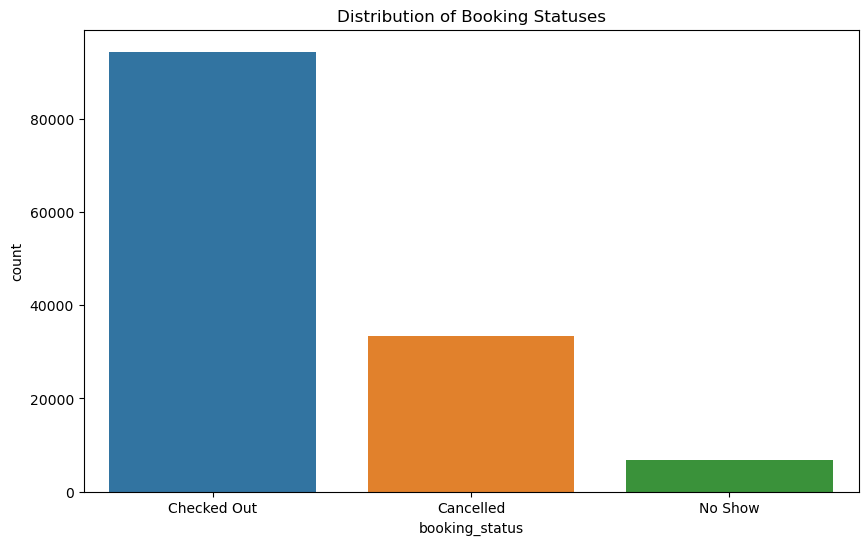

In [16]:
print("\nSummary statistics for fact_bookings:")
print(df_bookings.describe())

# Distribution of booking statuses
plt.figure(figsize=(10, 6))
sns.countplot(data=df_bookings, x='booking_status')
plt.title('Distribution of Booking Statuses')
plt.show()

In [17]:
# Total revenue generated
total_revenue = df_bookings['revenue_generated'].sum()
print(f"Total Revenue Generated: {total_revenue}")

# Total revenue realized
total_revenue_realized = df_bookings['revenue_realized'].sum()
print(f"Total Revenue Realized: {total_revenue_realized}")

Total Revenue Generated: 2007546215
Total Revenue Realized: 1708771229


In [18]:
# Occupancy percentage calculation
total_capacity = fact_aggregated_bookings['capacity'].sum()
total_successful_bookings = fact_aggregated_bookings['successful_bookings'].sum()
occupancy_percentage = (total_successful_bookings / total_capacity) * 100
print(f"Occupancy Percentage: {occupancy_percentage:.2f}%")

Occupancy Percentage: 57.87%


In [19]:
# Average ratings
average_ratings = df_bookings['ratings_given'].mean()
print(f"Average Ratings: {average_ratings:.2f}")

Average Ratings: 3.62


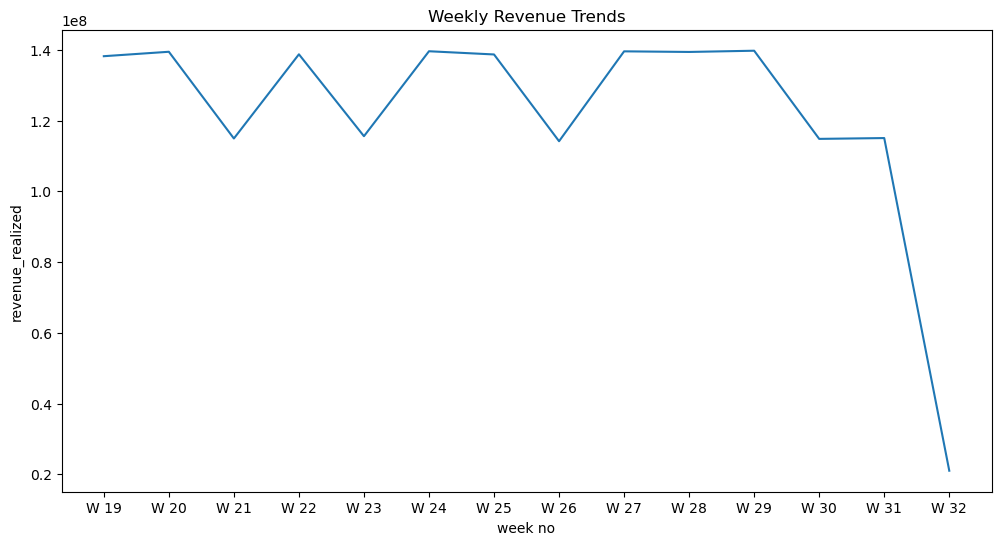

In [20]:
# Weekly revenue trends
weekly_revenue = df_bookings.groupby('week no')['revenue_realized'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_revenue, x='week no', y='revenue_realized')
plt.title('Weekly Revenue Trends')
plt.show()

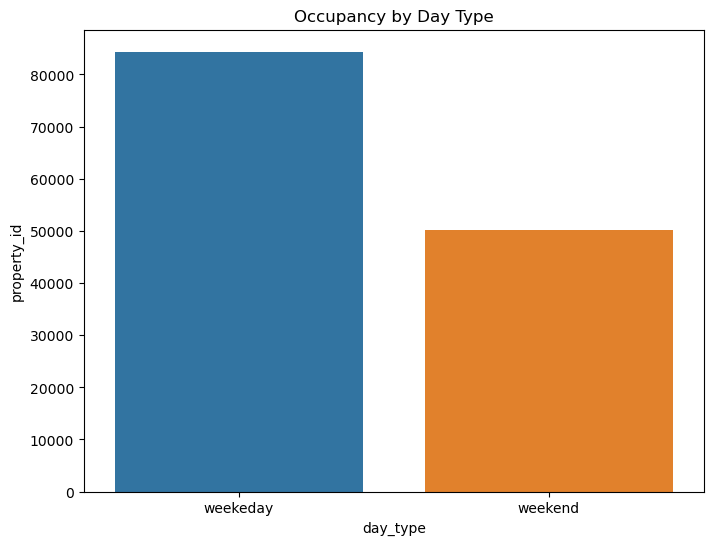

In [21]:
# Occupancy by day type
occupancy_by_day_type = df_bookings.groupby('day_type')['property_id'].count().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=occupancy_by_day_type, x='day_type', y='property_id')
plt.title('Occupancy by Day Type')
plt.show()

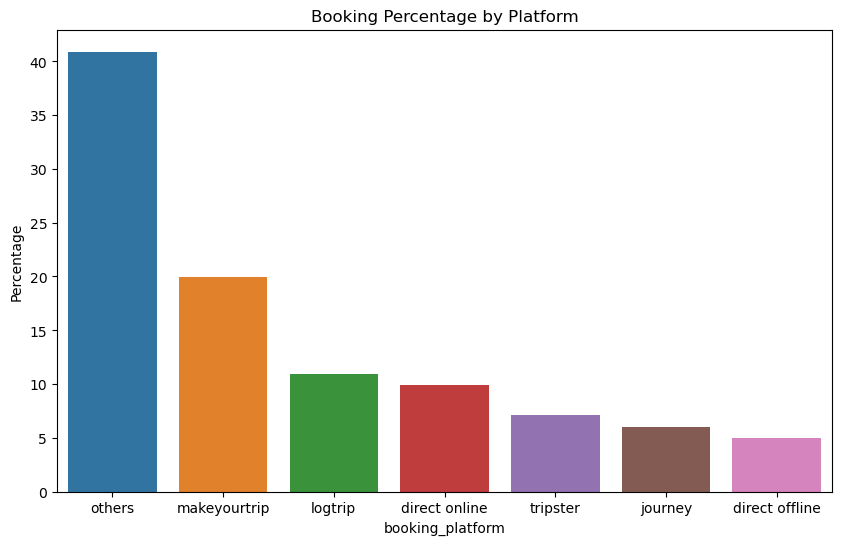

In [22]:
# Booking percentage by platform
platform_bookings = df_bookings['booking_platform'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_bookings.index, y=platform_bookings.values)
plt.title('Booking Percentage by Platform')
plt.ylabel('Percentage')
plt.show()

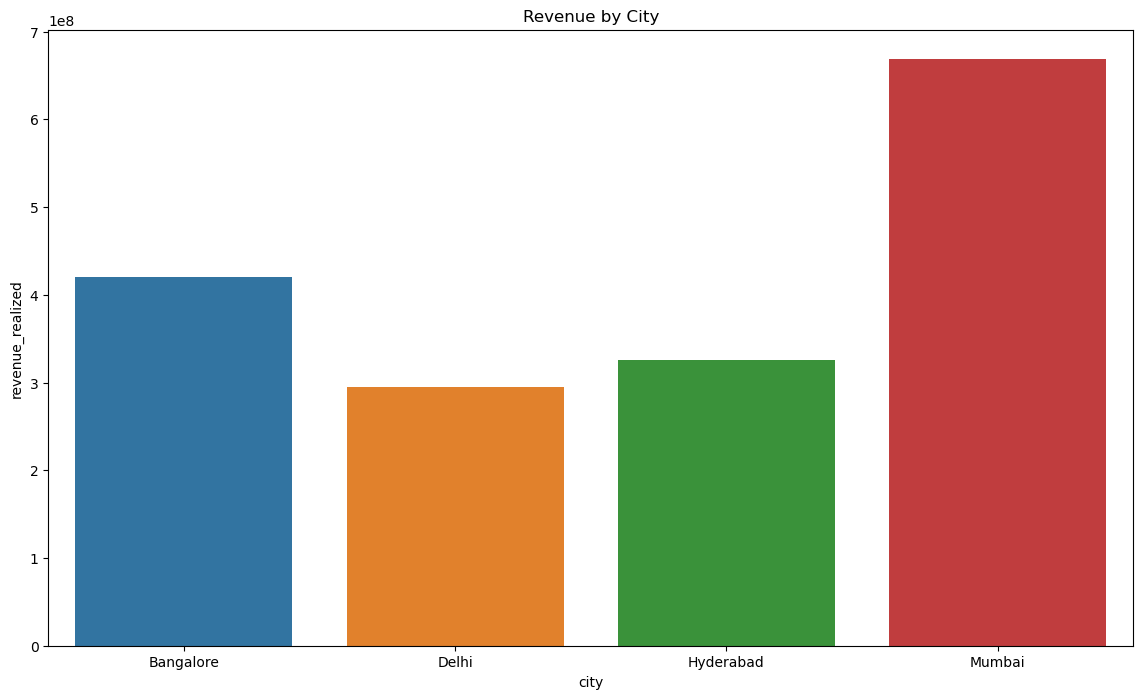

In [23]:
# Revenue by city
revenue_by_city = df_bookings.groupby('city')['revenue_realized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=revenue_by_city, x='city', y='revenue_realized')
plt.title('Revenue by City')
plt.show()

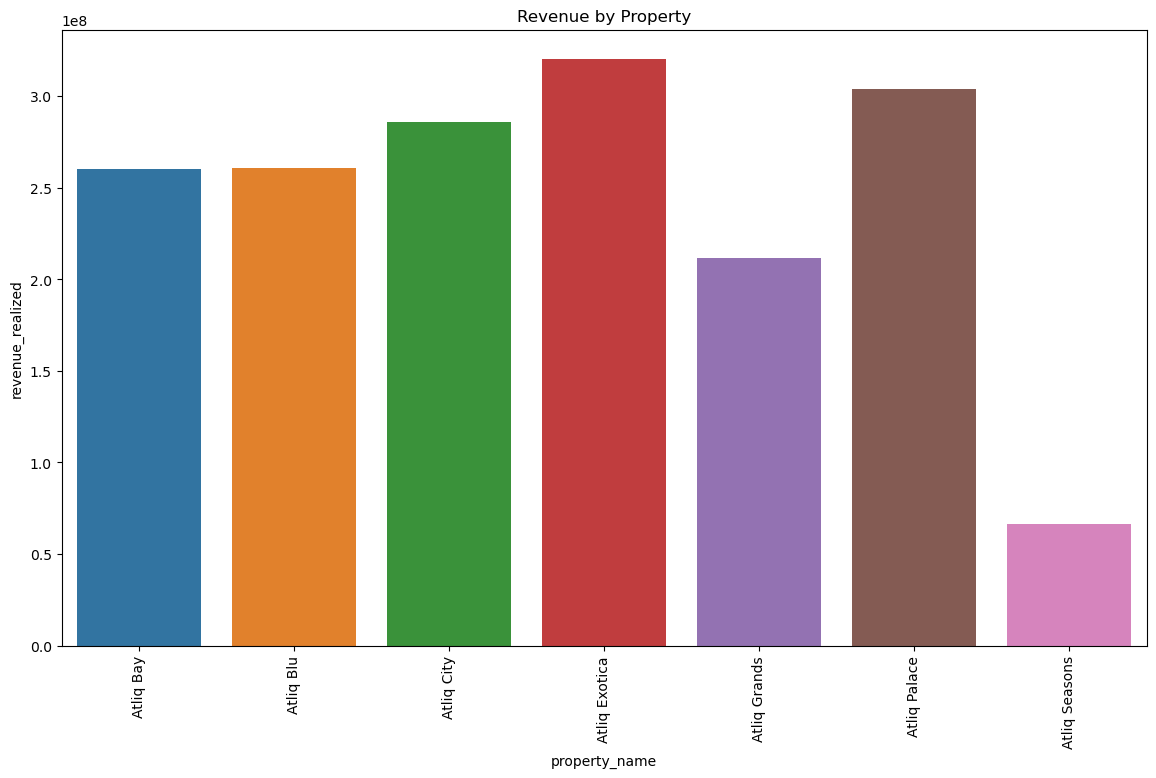

In [24]:
# Revenue by property
revenue_by_property = df_bookings.groupby('property_name')['revenue_realized'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=revenue_by_property, x='property_name', y='revenue_realized')
plt.title('Revenue by Property')
plt.xticks(rotation=90)
plt.show()